In [1]:
import sqlite3
import numpy as np
import pandas as pd
import glob
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

#  Laad alle foutmeldingen uit de database

In [2]:
# Maak verbinding met de database
con = sqlite3.connect("SCADA_Bruggen")
cur = con.cursor()
#tel en print het aantal rijen van de database
df = pd.read_sql("SELECT * FROM Bruggen WHERE Type == 'CAME'", con)
df.shape
con.close()

In [3]:
df.shape

(44524, 15)

In [4]:
temp_df = df[df.Omschrijving != "backup is running"]
temp_df['Tijd'] = pd.to_datetime(temp_df['Tijd'])
temp_df['Tijd came'] = pd.to_datetime(temp_df['Tijd came'])
temp_df['Tijd went'] = pd.to_datetime(temp_df['Tijd went'])
temp_df['Tijd ack'] = pd.to_datetime(temp_df['Tijd ack'])

C:\Users\denni\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\denni\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\denni\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [7]:
temp_df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35800 entries, 4 to 44522
Data columns (total 15 columns):
index           35800 non-null int64
Tijd            35800 non-null datetime64[ns]
Type            35800 non-null object
Klasse          35781 non-null float64
Waarde          35800 non-null object
ID              35670 non-null float64
Omschrijving    35800 non-null object
Status          35754 non-null object
Prioriteit      35754 non-null object
Tijd came       35800 non-null datetime64[ns]
Tijd went       35794 non-null datetime64[ns]
Tijd ack        24558 non-null datetime64[ns]
Gebr.ID         24564 non-null object
DPE             35800 non-null object
brug_ID         35800 non-null object
dtypes: datetime64[ns](4), float64(2), int64(1), object(8)
memory usage: 4.4+ MB


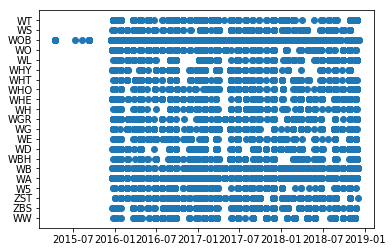

In [8]:
plt.plot_date(temp_df['Tijd'], temp_df['brug_ID'])

# Hoeveel verschillende foutmeldingen zijn er?

In [72]:
temp_df['Omschrijving'].value_counts()

Objectbewaking Alarm Niet Ingeschakeld                                                    1644
Brug Verzamelstoring                                                                      1344
Brug Directe Stop                                                                         1110
Afsluitboom 2 Storing                                                                      916
Afsluitboom 1 Storing                                                                      857
Noodstop Actief                                                                            842
Afsluitboom 1 Noodstop                                                                     723
Afsluitboom 2 Noodstop                                                                     723
Veiligheidsgerelateerde Hardware Fout Opgetreden                                           560
Camera 5 Communicatie Storing                                                              514
Brug Grendel Directe Stop                         

# Wat zijn de klasses van de meldingen

Klasse 1 (urgent)
Klasse 2 (niet urgent)
Klasse 3 (proces en bediening)
Klasse 4 (onderhoud)
Klasse 5 (onderhoud bericht)
Klasse 6 (attentie)
Klasse 7 (bewaking)

In [166]:
temp_df['Klasse'].value_counts()

1.0    29188
2.0     4484
5.0     1644
6.0      256
7.0      206
4.0        3
Name: Klasse, dtype: int64

# Op welke datums komen de foutmeldingen voor

## alle bruggen

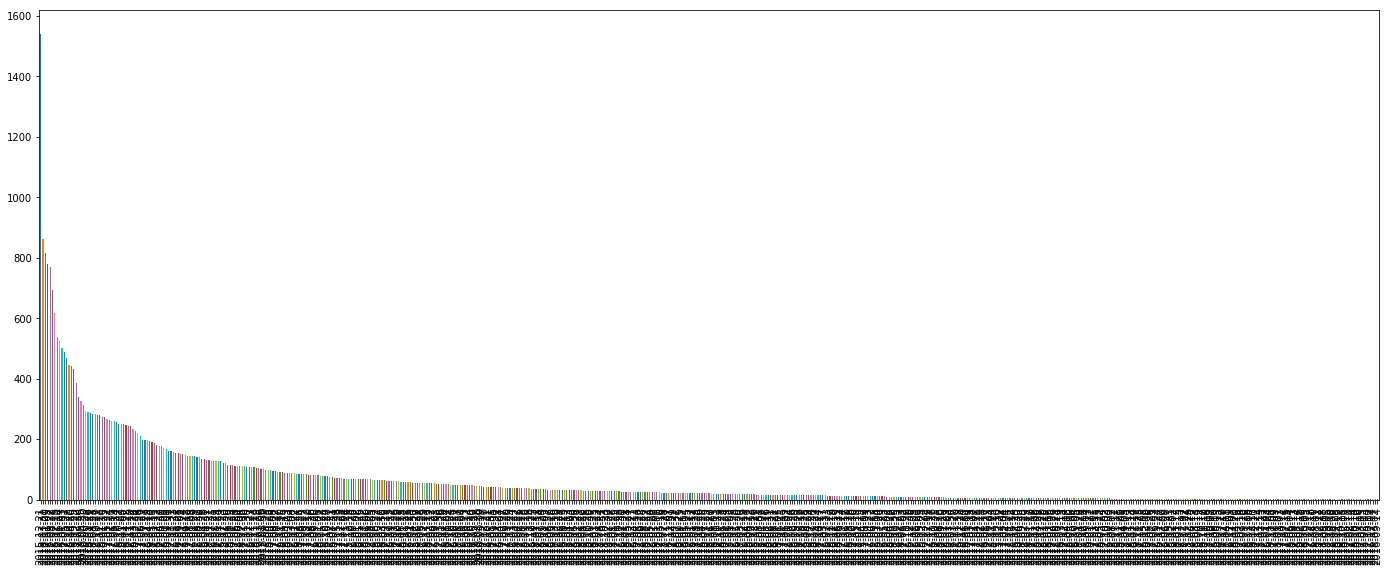

In [78]:
temp_df['Tijd'].dt.date.value_counts().plot.bar(figsize = (24,9))

Text(0, 0.5, 'aantal meldingen')

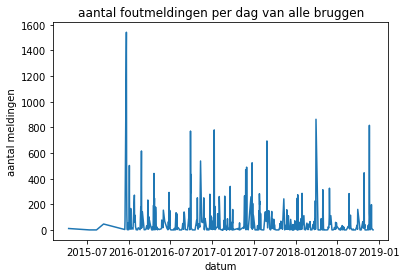

In [55]:
temp_df.groupby(temp_df['Tijd'].dt.date)['Tijd'].count().plot.line()
plt.title('aantal foutmeldingen per dag van alle bruggen')
plt.xlabel('datum')
plt.ylabel('aantal meldingen')

Text(0, 0.5, 'aantal meldingen')

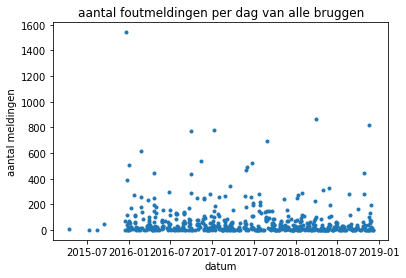

In [22]:
plt.plot(temp_df['Tijd'].dt.date.value_counts(), '.')
plt.title('aantal foutmeldingen per dag van alle bruggen')
plt.xlabel('datum')
plt.ylabel('aantal meldingen')


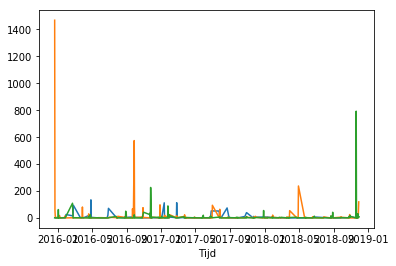

In [75]:
W5_df = temp_df[temp_df.brug_ID == 'W5']
WA_df = temp_df[temp_df.brug_ID == 'WA']
WB_df = temp_df[temp_df.brug_ID == 'WB']
W5_df.groupby(W5_df['Tijd'].dt.date)['Tijd'].count().plot.line()
WA_df.groupby(WA_df['Tijd'].dt.date)['Tijd'].count().plot.line()
WB_df.groupby(WB_df['Tijd'].dt.date)['Tijd'].count().plot.line()

In [107]:
temp_df.head()

,index,Tijd,Type,Klasse,Waarde,ID,Omschrijving,Status,Prioriteit,Tijd came,Tijd went,Tijd ack,Gebr.ID,DPE,brug_ID
4,121061,2015-12-23 12:28:36.232,CAME,1.0,FALSE,1200005.0,NO storing bediening en besturing,Openstaand,Urgent,2015-12-23 12:28:36.232,2015-12-23 12:28:37.359,2015-12-23 13:23:10.287,0,NO_BRUG.STATUS.NO_OK,WW
16,268184,2016-01-27 14:57:23.699,CAME,5.0,TRUE,470008.0,Objectbewaking Alarm Niet Ingeschakeld,Openstaand,Onderhoud,2016-01-27 14:57:23.699,2016-01-27 15:40:43.201,NaT,None,DB_V61-Objectbewaking-S.Alarm._08,WW
22,288942,2016-01-02 11:07:06.202,CAME,5.0,TRUE,470008.0,Objectbewaking Alarm Niet Ingeschakeld,Openstaand,Onderhoud,2016-01-02 11:07:06.202,2016-01-02 12:41:15.687,NaT,None,DB_V61-Objectbewaking-S.Alarm._08,WW
32,441919,2016-01-03 09:16:45.894,CAME,2.0,TRUE,120038.0,Brug Hydrauliek Unit Werkschakelaar Uitgeschakeld,Openstaand,Waarschuwing,2016-01-03 09:16:45.894,2016-01-03 09:38:12.596,2016-01-03 09:39:17.943,62,DB_A11-Brug-S.Alarm._38,WW
33,441920,2016-01-03 09:16:45.894,CAME,1.0,TRUE,120058.0,Brug Houddrukpomp Niet Beschikbaar,Openstaand,Urgent,2016-01-03 09:16:45.894,2016-01-03 09:38:12.596,2016-01-03 09:39:17.943,62,DB_A11-Brug-S.Alarm._58,WW


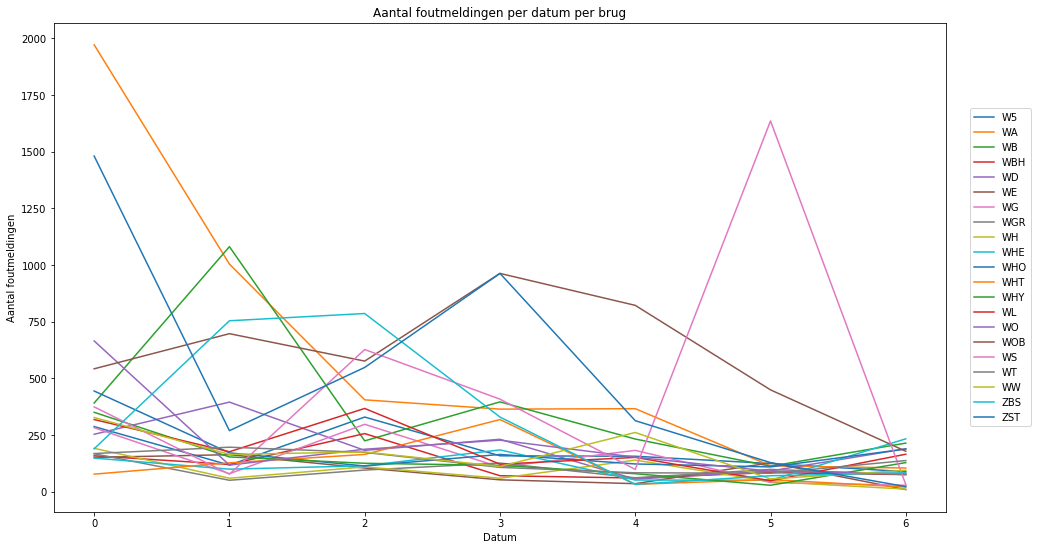

In [151]:
bruggen = ['W5', 'WA', 'WB', 'WBH', 'WD', 'WE', 'WG', 'WGR', 'WH', 'WHE', 'WHO', 'WHT', 'WHY', 'WL', 'WO', 'WOB', 'WS', 'WT', 'WW', 'ZBS', 'ZST']
for brug in bruggen:
    temp_df2 = temp_df[temp_df.brug_ID == brug]
    data = temp_df2.groupby(temp_df2['Tijd'].dt.dayofweek)['Tijd'].count().plot.line(figsize = (16,9))
    data.legend(bruggen,loc = 5,bbox_to_anchor=(1.1, 0.5))
    data.set_xlabel("Datum")
    data.set_ylabel("Aantal foutmeldingen")
    data.set_title("Aantal foutmeldingen per datum per brug")


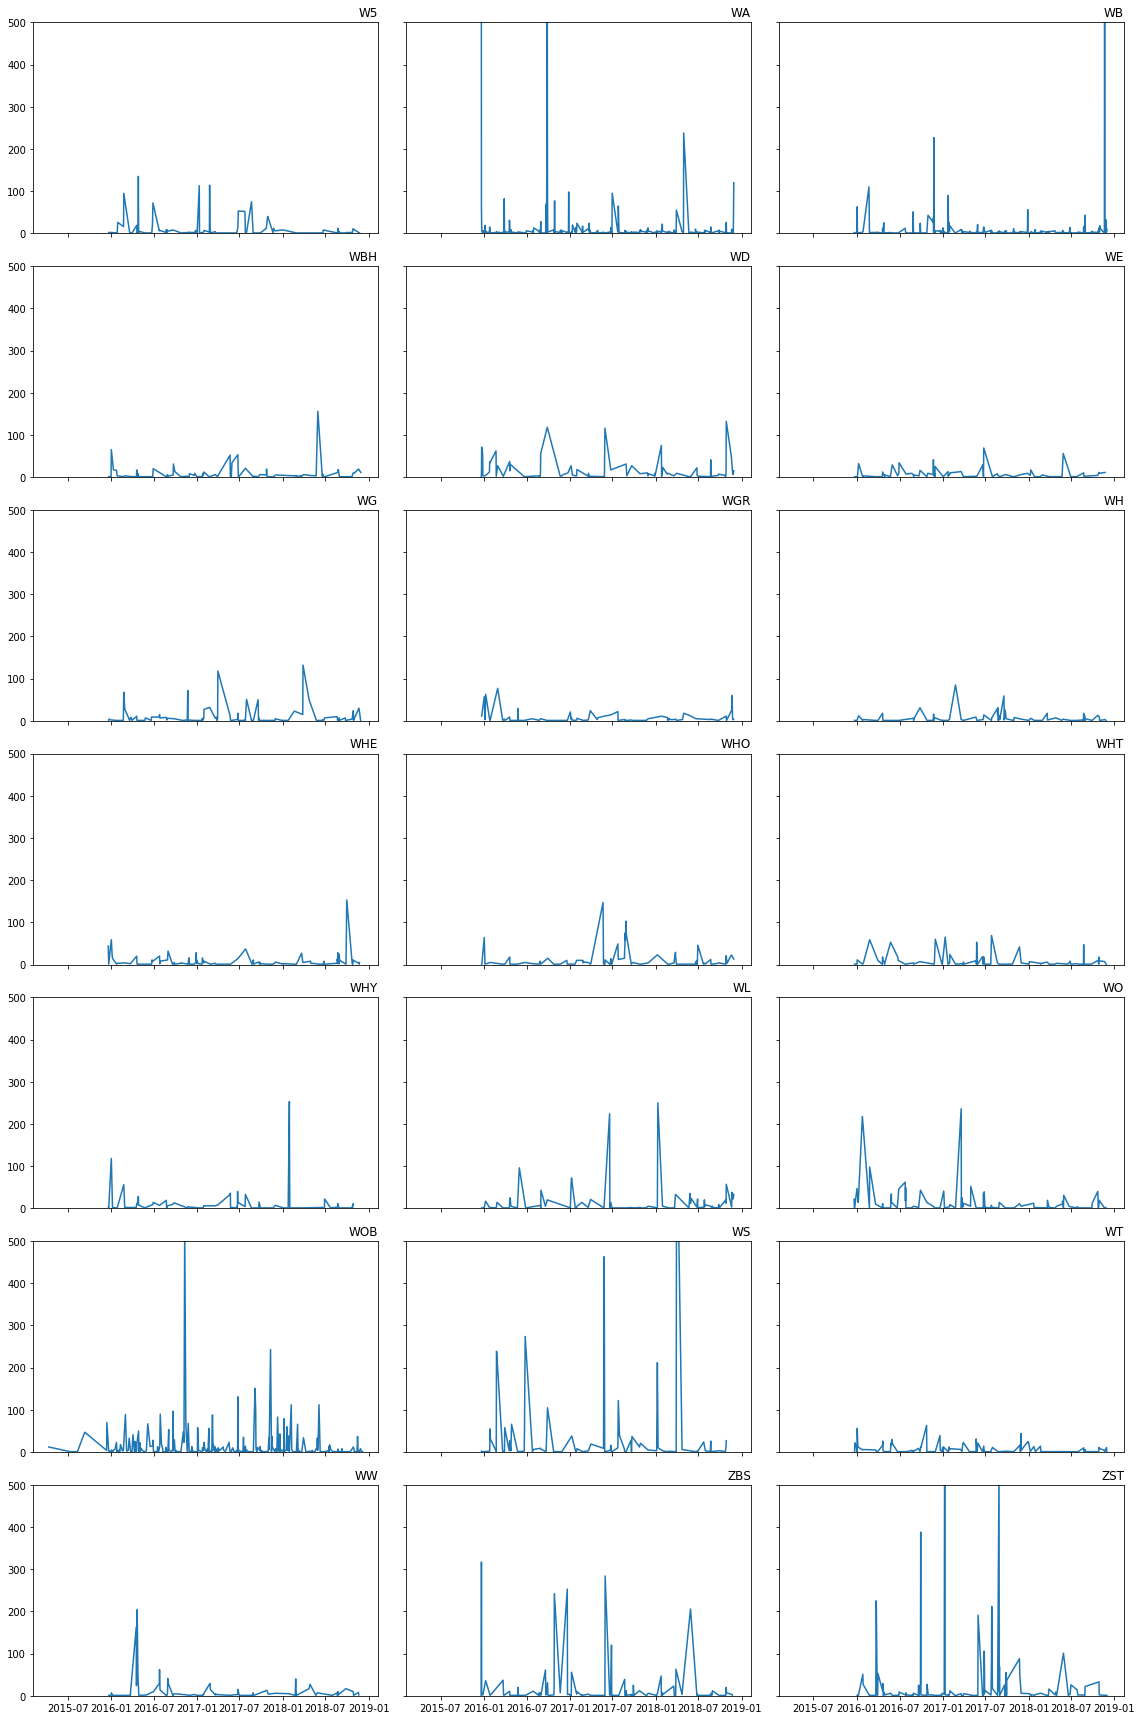

In [72]:
bruggen = ['W5', 'WA', 'WB', 'WBH', 'WD', 'WE', 'WG', 'WGR', 'WH', 'WHE', 'WHO', 'WHT', 'WHY', 'WL', 'WO', 'WOB', 'WS', 'WT', 'WW', 'ZBS', 'ZST']
fig, ax = plt.subplots(7, 3, sharex=True, sharey=True, figsize=(16,24))
xc = 0
yc = 0
for brug in bruggen:
    temp_df2 = temp_df[temp_df.brug_ID == brug]
    data = temp_df2.groupby(temp_df2['Tijd'].dt.date)['Tijd'].count()
    #ax[xc,yc] = temp_df2.groupby(temp_df2['Tijd'].dt.year)['Tijd'].count().plot(kind = "box")
    ax[xc,yc].plot(data)
    ax[xc,yc].set_title(brug, loc = "right")
    #ax[xc,yc] = plt.title("Aantal foutmeldingen per maand per brug")
    #ax[xc,yc] = plt.xlabel("Maand")
    #ax[xc,yc] = plt.ylabel("Aantal Foutmeldingen")
    if yc < 2:
        yc += 1
    else:
        yc = 0
        xc +=1
    if xc == 7:
        xc = 0
plt.ylim(0,500)        
plt.tight_layout()
    
        

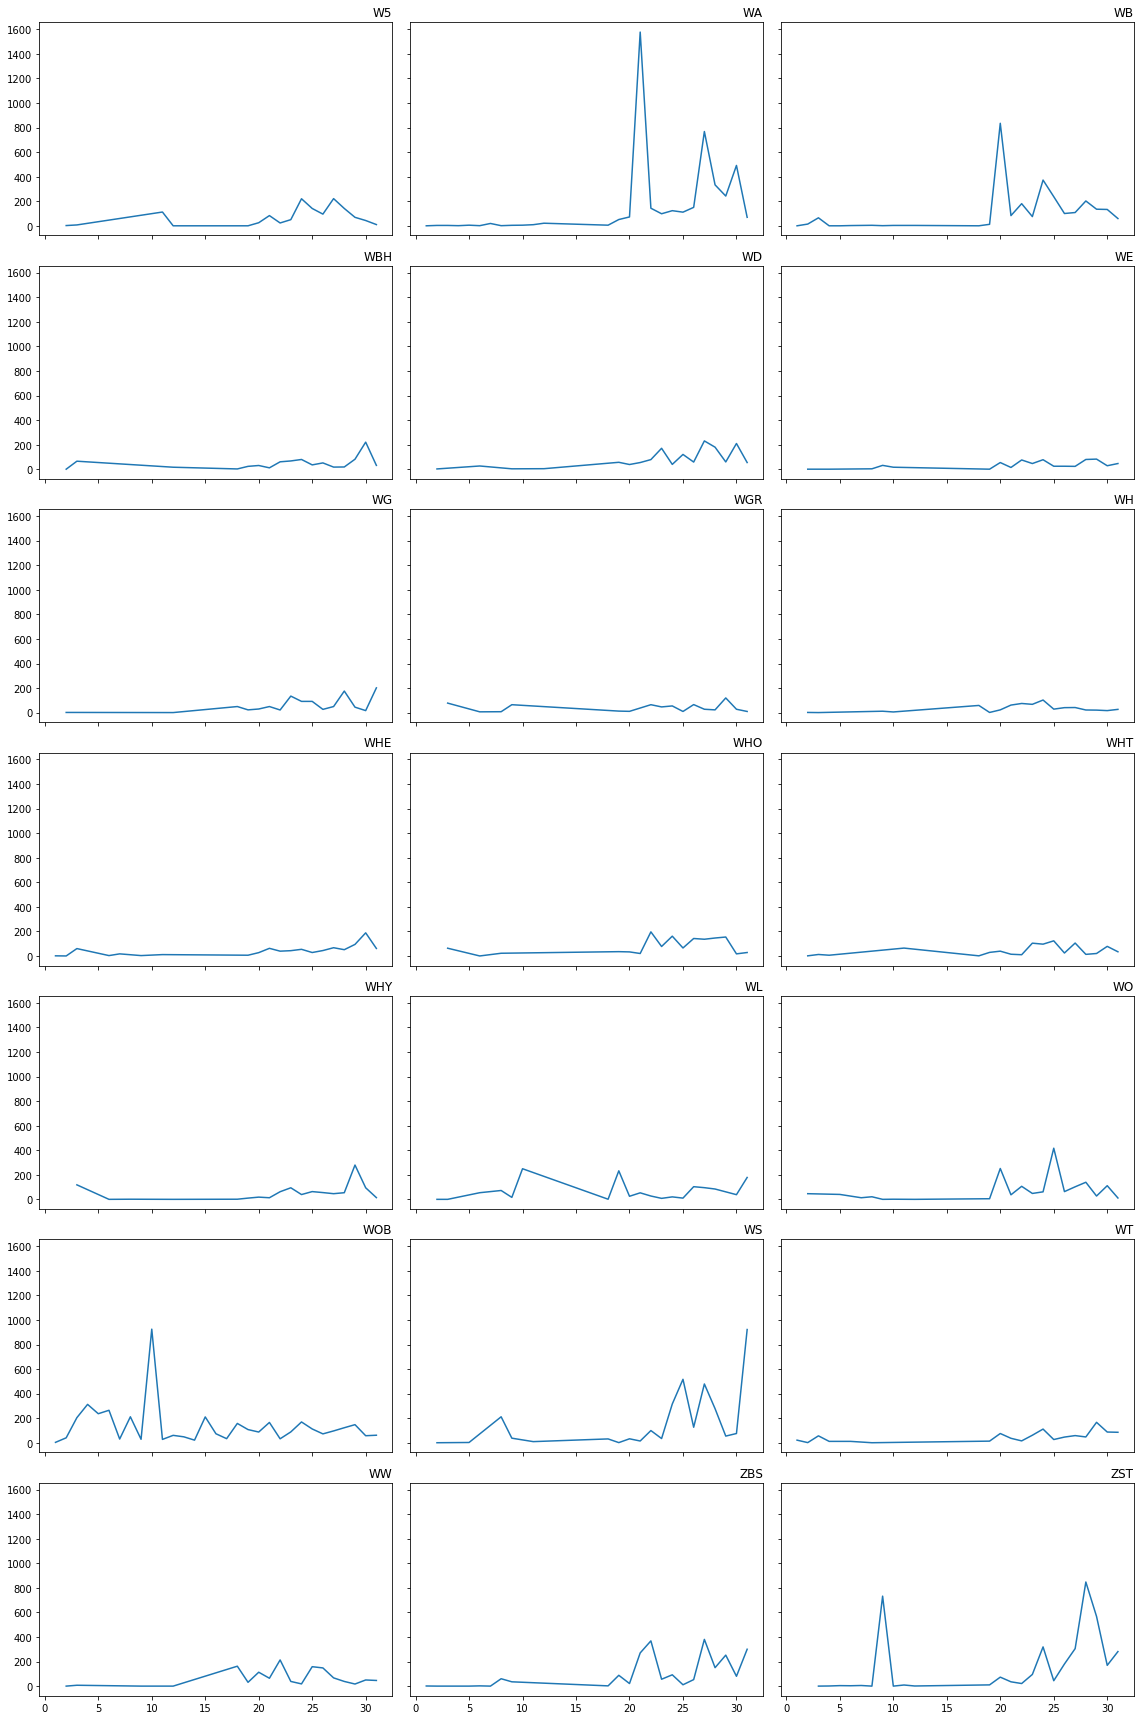

In [119]:
bruggen = ['W5', 'WA', 'WB', 'WBH', 'WD', 'WE', 'WG', 'WGR', 'WH', 'WHE', 'WHO', 'WHT', 'WHY', 'WL', 'WO', 'WOB', 'WS', 'WT', 'WW', 'ZBS', 'ZST']
fig, ax = plt.subplots(7, 3, sharex=True, sharey=True, figsize=(16,24))
xc = 0
yc = 0
for brug in bruggen:
    temp_df2 = temp_df[temp_df.brug_ID == brug]
    data = temp_df2.groupby(temp_df2['Tijd'].dt.day)['Tijd'].count()
    #ax[xc,yc] = temp_df2.groupby(temp_df2['Tijd'].dt.year)['Tijd'].count().plot(kind = "box")
    ax[xc,yc].plot(data)
    ax[xc,yc].set_title(brug, loc = "right")
    #ax[xc,yc] = plt.title("Aantal foutmeldingen per maand per brug")
    #ax[xc,yc] = plt.xlabel("Maand")
    #ax[xc,yc] = plt.ylabel("Aantal Foutmeldingen")
    if yc < 2:
        yc += 1
    else:
        yc = 0
        xc +=1
    if xc == 7:
        xc = 0
        
plt.tight_layout()
    
        

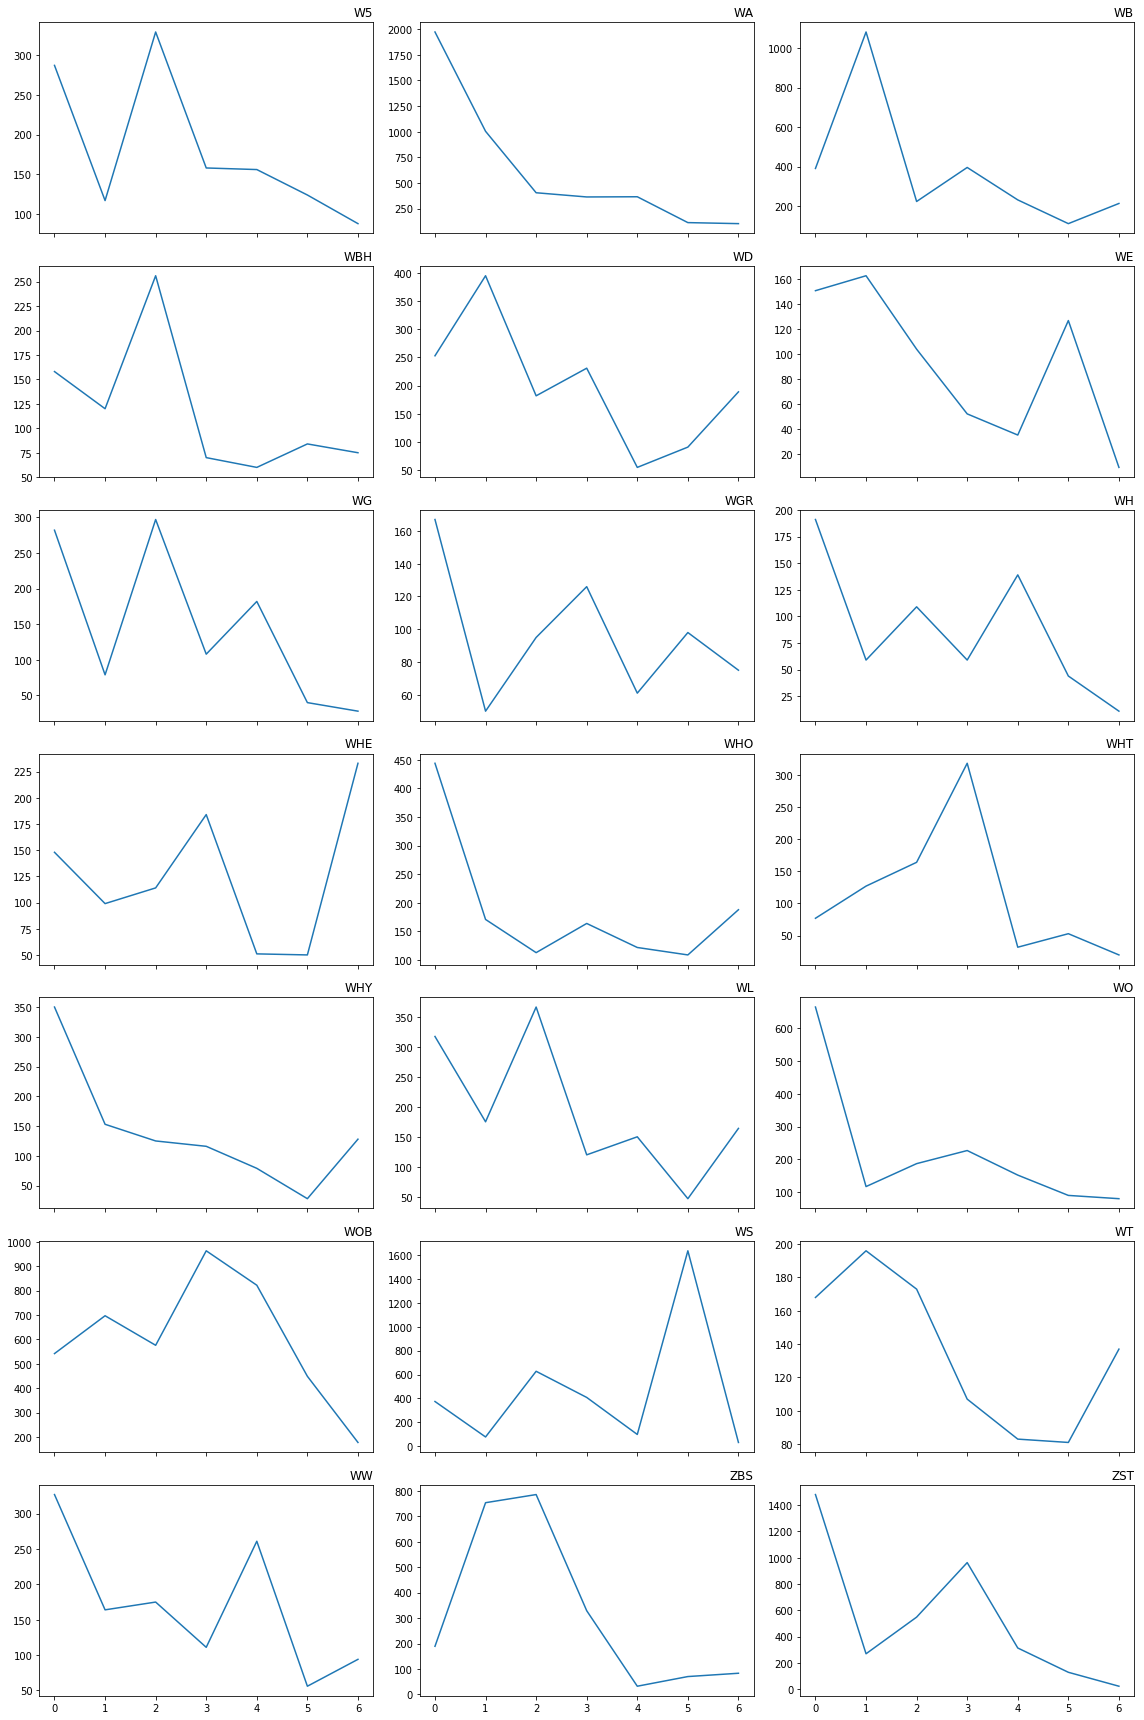

In [147]:
bruggen = ['W5', 'WA', 'WB', 'WBH', 'WD', 'WE', 'WG', 'WGR', 'WH', 'WHE', 'WHO', 'WHT', 'WHY', 'WL', 'WO', 'WOB', 'WS', 'WT', 'WW', 'ZBS', 'ZST']
maanden = ['januari', 'februari', 'Maart', 'April', 'Mei', 'Juni', "Juli", "Augustus", "September", "October", "November", 'December']
fig, ax = plt.subplots(7, 3, sharex=True, sharey=False, figsize=(16,24))
xc = 0
yc = 0
for brug in bruggen:
    temp_df2 = temp_df[temp_df.brug_ID == brug]
    data = temp_df2.groupby(temp_df2['Tijd'].dt.dayofweek)['Tijd'].count()
    #ax[xc,yc] = temp_df2.groupby(temp_df2['Tijd'].dt.year)['Tijd'].count().plot(kind = "box")
    ax[xc,yc].plot(data)
    ax[xc,yc].set_title(brug, loc = "right")
    #ax[xc,yc] = plt.title("Aantal foutmeldingen per maand per brug")
    #ax[xc,yc] = plt.xlabel("Maand")
    #ax[xc,yc] = plt.ylabel("Aantal Foutmeldingen")
    if yc < 2:
        yc += 1
    else:
        yc = 0
        xc +=1
    if xc == 7:
        xc = 0
        
plt.tight_layout()
    
        

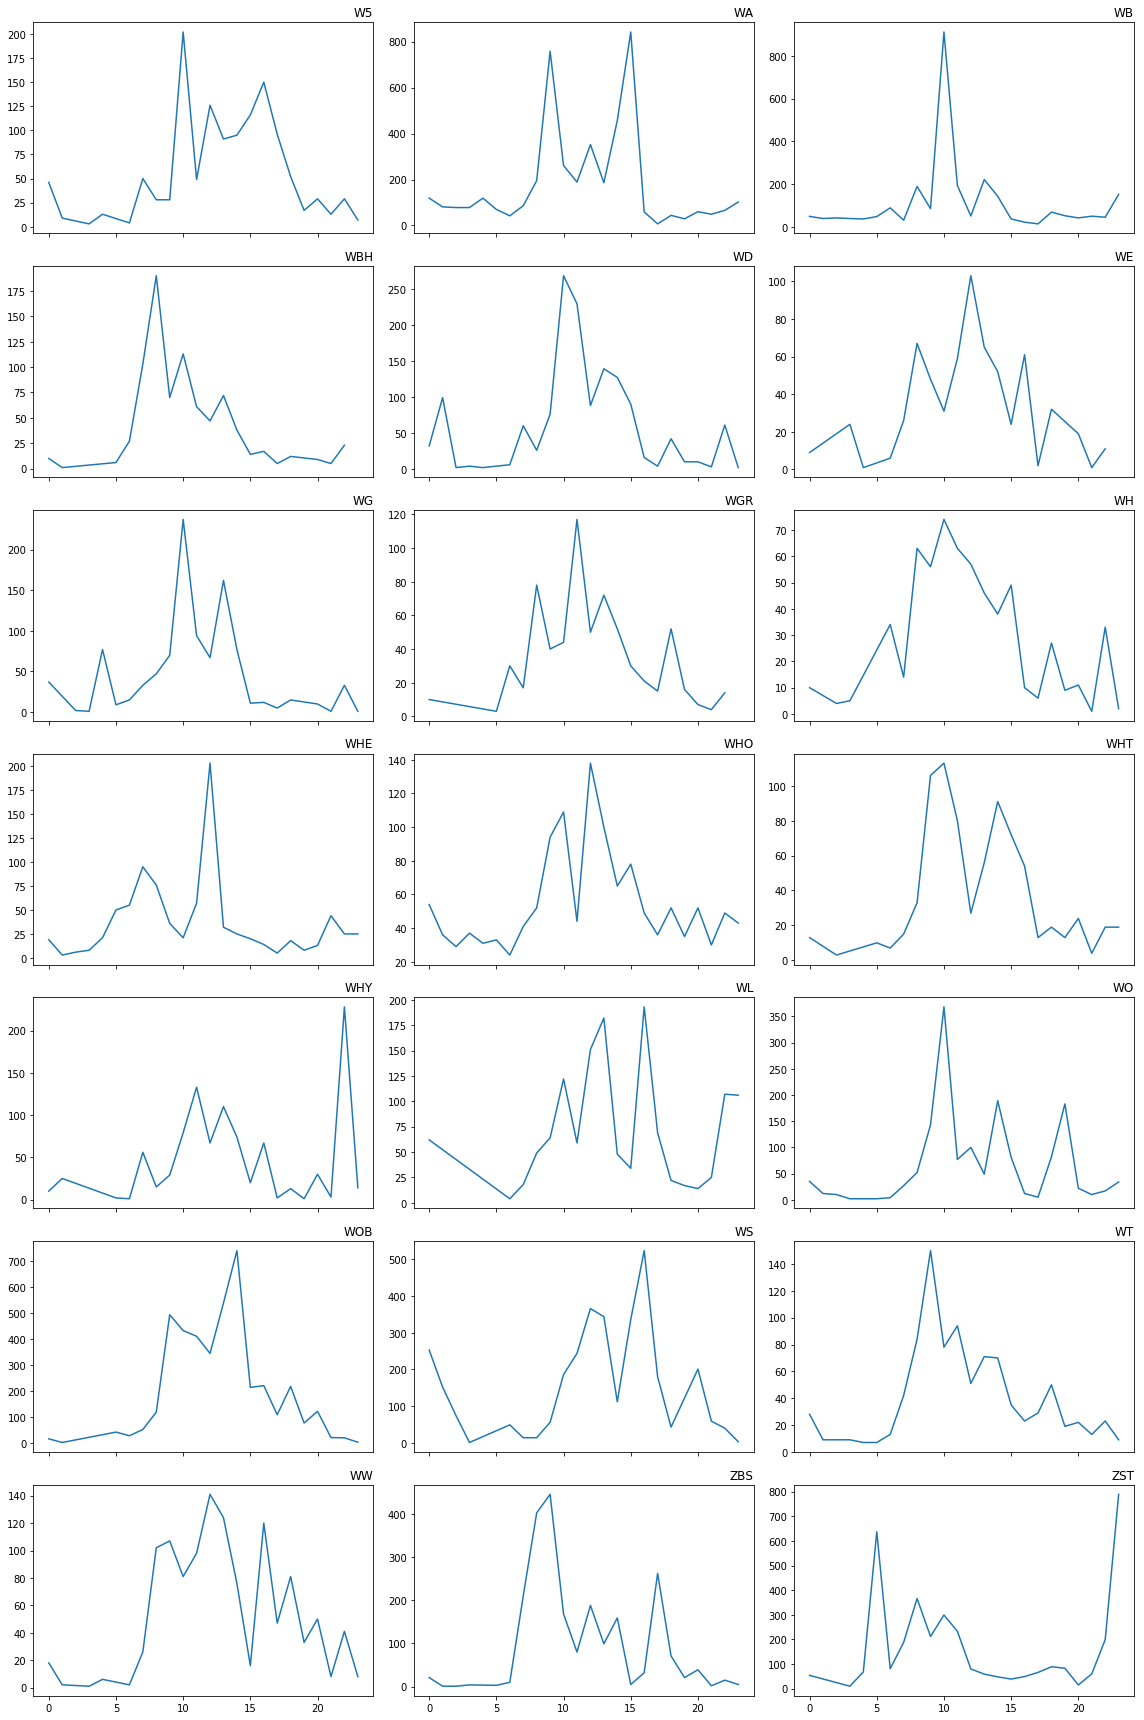

In [123]:
bruggen = ['W5', 'WA', 'WB', 'WBH', 'WD', 'WE', 'WG', 'WGR', 'WH', 'WHE', 'WHO', 'WHT', 'WHY', 'WL', 'WO', 'WOB', 'WS', 'WT', 'WW', 'ZBS', 'ZST']
fig, ax = plt.subplots(7, 3, sharex=True, sharey=False, figsize=(16,24))
xc = 0
yc = 0
for brug in bruggen:
    temp_df2 = temp_df[temp_df.brug_ID == brug]
    data = temp_df2.groupby(temp_df2['Tijd'].dt.hour)['Tijd'].count()
    #ax[xc,yc] = temp_df2.groupby(temp_df2['Tijd'].dt.year)['Tijd'].count().plot(kind = "box")
    ax[xc,yc].plot(data)
    #ax[xc,yc].plot(temp_df2.groupby(temp_df2['Tijd'].dt.month)['Tijd'].count())
    ax[xc,yc].set_title(brug, loc = "right")
    #ax[xc,yc] = plt.title("Aantal foutmeldingen per maand per brug")
    #ax[xc,yc] = plt.xlabel("Maand")
    #ax[xc,yc] = plt.ylabel("Aantal Foutmeldingen")
    if yc < 2:
        yc += 1
    else:
        yc = 0
        xc +=1
    if xc == 7:
        xc = 0
        
plt.tight_layout()
    
        

In [109]:
temp_df3.head()

4197    January
4198    January
4199    January
4200    January
4201    January
Name: Tijd, dtype: object

## van de brug W5

Text(0, 0.5, 'aantal foutmeldingen per dag')

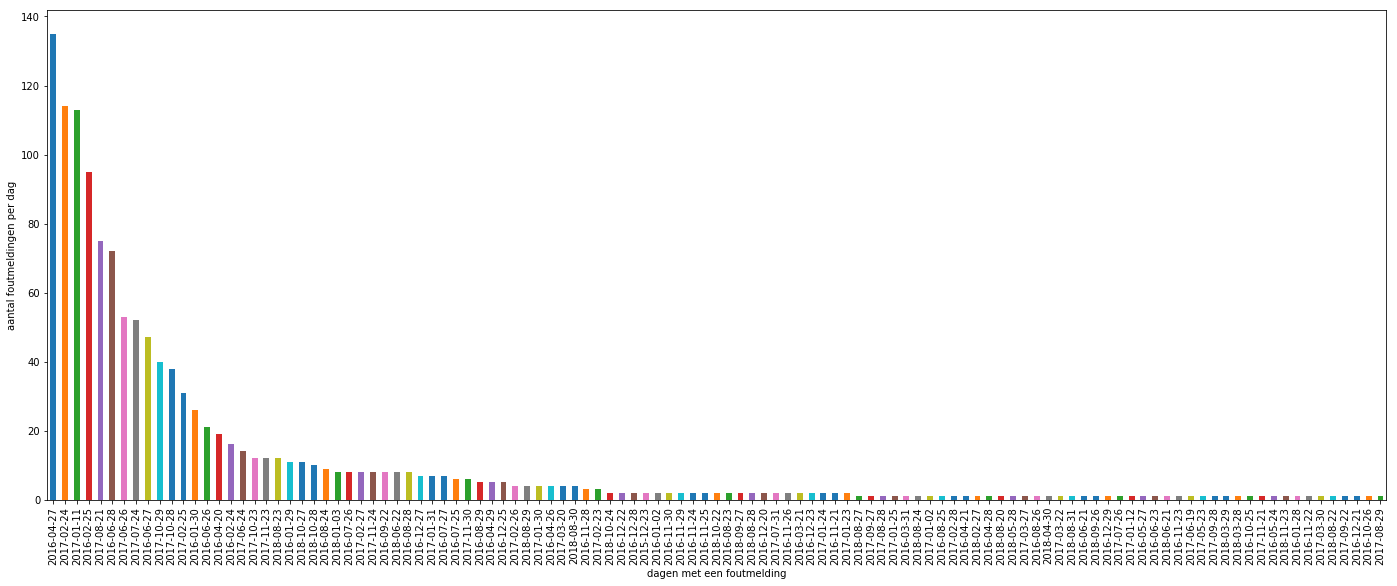

In [93]:
W5_df = temp_df[temp_df.brug_ID == 'W5']
ax = W5_df['Tijd'].dt.date.value_counts().plot.bar(figsize = (24,9))
ax.set_xlabel('dagen met een foutmelding')
ax.set_ylabel('aantal foutmeldingen per dag')

Text(0, 0.5, 'aantal meldingen')

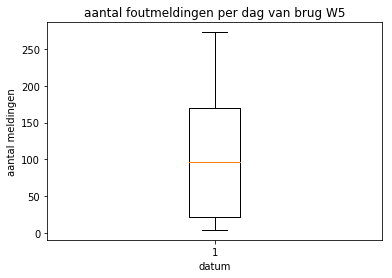

In [113]:
plt.boxplot(W5_df['Tijd'].dt.month.value_counts())
plt.title('aantal foutmeldingen per dag van brug W5')
plt.xlabel('datum')
plt.ylabel('aantal meldingen')

# Welke klasses komen voor in de foutmeldingen van burg W5

In [83]:
W5_df['Klasse'].value_counts()

1.0    897
2.0    258
5.0     97
7.0      7
Name: Klasse, dtype: int64

## Welke soorten foutmeldingen vallen er onder de klasses

In [153]:
# omschrijvingen van alle foutmeldingen uit klasse 1 (urgent) van brug W5
W5_k1 = W5_df[W5_df.Klasse == 1]
W5_k1['Omschrijving'].value_counts()

Praatpaal PP-01 Link Down (NCT)                                                                   98
Praatpaal PP-01 Link Down                                                                         61
Afsluitboom 2 Storing                                                                             57
Brug Verzamelstoring                                                                              55
Brug Directe Stop                                                                                 50
Afsluitboom 1 Storing                                                                             43
Brug Grendel Directe Stop                                                                         42
Noodstop Actief                                                                                   40
Brug Noodstop                                                                                     38
Afsluitboom 2 Noodstop                                                                     

Text(0, 0.5, 'Aantal meldingen')

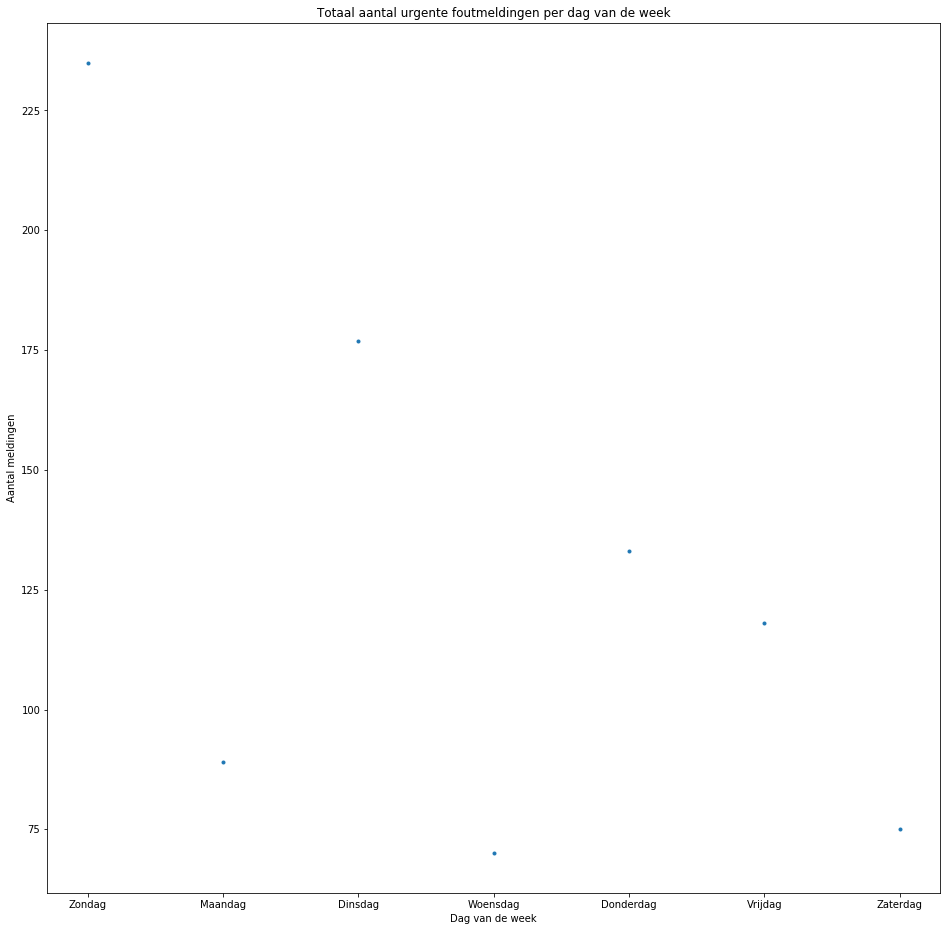

In [177]:
plt.plot(W5_k1['Tijd'].dt.dayofweek.value_counts(), '.')
plt.title('Totaal aantal urgente foutmeldingen per dag van de week')
plt.rcParams["figure.figsize"] = (16,16)
plt.xticks(np.arange(7), ('Zondag', 'Maandag', 'Dinsdag', 'Woensdag', 'Donderdag', 'Vrijdag','Zaterdag'))
plt.xlabel('Dag van de week')
plt.ylabel('Aantal meldingen')

Text(0, 0.5, 'Aantal meldingen')

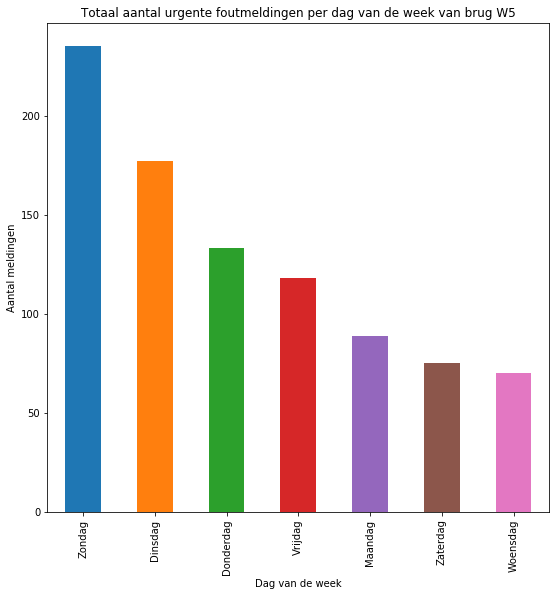

In [191]:
labels = ('Zondag', 'Maandag', 'Dinsdag', 'Woensdag', 'Donderdag', 'Vrijdag','Zaterdag')
W5_k1['Tijd'].dt.dayofweek.value_counts().plot.bar(sort_columns  =  True)

plt.title('Totaal aantal urgente foutmeldingen per dag van de week van brug W5')
plt.rcParams["figure.figsize"] = (9,9)

plt.xticks(np.arange(7), ('Zondag','Dinsdag' , 'Donderdag','Vrijdag' ,'Maandag' ,'Zaterdag','Woensdag'))
plt.xlabel('Dag van de week')
plt.ylabel('Aantal meldingen')

In [173]:
# klasse 2 (niet urgent)
W5_k2 = W5_df[W5_df.Klasse == 2]
W5_k2['Omschrijving'].value_counts()

Scheepvaartsein 8 Rood Storing [S11-H1011]                                                       27
Scheepvaartsein 8 Rood Lampfout [S11-H1011]                                                      27
CVE CPU SF (System Fault)                                                                        16
Brug Houddrukpomp Niet Beschikbaar                                                               12
Brug Hydrauliek Unit Werkschakelaar Uitgeschakeld                                                 7
Scheepvaartsein 4 Rood Lampfout [S11-H1011]                                                       6
UPS 1 Luchtvochtigheid Te Hoog                                                                    6
UPS 1 Temperatuur Te Hoog                                                                         6
Scheepvaartsein 4 Rood Storing [S11-H1011]                                                        6
Brug Houddrukpomp Technische Beperking                                                            6


In [162]:
# klasse 5 (onderhouds bericht)
W5_k5 = W5_df[W5_df.Klasse == 5]
W5_k5['Omschrijving'].value_counts()

Objectbewaking Alarm Niet Ingeschakeld    97
Name: Omschrijving, dtype: int64

In [163]:
# klasse 7 (bewaking)
W5_k7 = W5_df[W5_df.Klasse == 7]
W5_k7['Omschrijving'].value_counts()

Objectbewaking Inbraak Melding    6
Objectbewaking Brand Melding      1
Name: Omschrijving, dtype: int64

# Het aantal foutmeldingen per brug

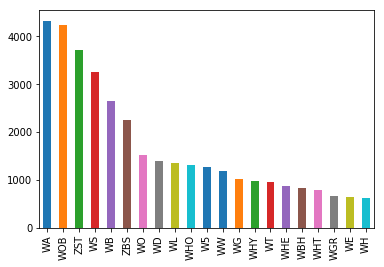

In [92]:
temp_df['brug_ID'].value_counts().plot.bar()

In [97]:
temp_df['brug_ID'].value_counts()


WA     4329
WOB    4227
ZST    3724
WS     3251
WB     2650
ZBS    2243
WO     1518
WD     1396
WL     1346
WHO    1311
W5     1259
WW     1188
WG     1016
WHY     979
WT      945
WHE     879
WBH     823
WHT     791
WGR     672
WE      641
WH      612
Name: brug_ID, dtype: int64

In [98]:
temp_df.shape[0]

35800

# playground

In [153]:
# Maak verbinding met de database
con = sqlite3.connect("SCADA_Bruggen")
cur = con.cursor()
cur.execute("DROP TABLE modelDB")
con.commit()
con.close()

In [155]:
# Maak verbinding met de database
con = sqlite3.connect("SCADA_Bruggen")
cur = con.cursor()
for rows in cur.execute("SELECT * FROM modelDB"):
        print(rows)
        
con.commit()
con.close()

('W5', 1259.0)
('WA', 4329.0)
('WB', 2650.0)
('WBH', 823.0)
('WD', 1396.0)
('WE', 641.0)
('WG', 1016.0)
('WGR', 672.0)
('WH', 612.0)
('WHE', 879.0)
('WHO', 1311.0)
('WHT', 791.0)
('WHY', 979.0)
('WL', 1346.0)
('WO', 1518.0)
('WOB', 4227.0)
('WS', 3251.0)
('WT', 945.0)
('WW', 1188.0)
('ZBS', 2243.0)
('ZST', 3724.0)


In [154]:
bruggen = ['W5', 'WA', 'WB', 'WBH', 'WD', 'WE', 'WG', 'WGR', 'WH', 'WHE', 'WHO', 'WHT', 'WHY', 'WL', 'WO', 'WOB', 'WS', 'WT', 'WW', 'ZBS', 'ZST']

CameDict = {}


# Maak verbinding met de database
con = sqlite3.connect("SCADA_Bruggen")
cur = con.cursor()
cur.execute("CREATE TABLE modelDB (brug_ID text, Came_meldingen real)")
for x in bruggen:
    temp_df2 = temp_df[temp_df.brug_ID == x]
    cur.execute("INSERT INTO modelDB VALUES(?,?)", (x,temp_df2.shape[0]))
    
con.commit()
con.close()


In [7]:
path =r'csv\WS' 
allFiles = glob.glob(path + "/*.csv")

list_ = []

# Uitlezen van de csv files
for file_ in allFiles:
    df = pd.read_csv(file_, skiprows=23, delimiter=";", encoding = "ansi", parse_dates= ["Tijd","Tijd came", "Tijd went", "Tijd ack"]) #pas alle datum kolommen aan naar datetime type
    df2 = df.iloc[:,0:14] #verwijder een lege kolom aan het einde van de dataset
    list_.append(df2)

frame = pd.concat(list_, axis = 0, ignore_index = True)
frame.shape

(3188889, 14)

In [8]:
frame.head()

,Tijd,Type,Klasse,Waarde,ID,Omschrijving,Status,Prioriteit,Cmnt.,Tijd came,Tijd went,Tijd ack,Gebr.ID,DPE
0,2015-01-12 20:13:03.721,LOG-IN,NaN,NaN,NaN,Afstand: meekijken,NaN,NaN,NaN,NaT,NaT,NaT,65535,NO_BRUG
1,2015-01-12 19:15:16.198,LOG-IN,NaN,NaN,NaN,Afstand: operator,NaN,NaN,NaN,NaT,NaT,NaT,38,NO_BRUG
2,2015-01-12 19:15:14.603,LOG-UIT,NaN,NaN,NaN,Afstand: meekijken,NaN,NaN,NaN,NaT,NaT,NaT,4097,NO_BRUG
3,2015-01-12 19:15:14.597,LOG-UIT,NaN,NaN,NaN,Afstand: meekijken,NaN,NaN,NaN,NaT,NaT,NaT,4097,NO_BRUG
4,2015-01-12 17:11:29.244,LOG-IN,NaN,NaN,NaN,Afstand: meekijken,NaN,NaN,NaN,NaT,NaT,NaT,65535,NO_BRUG
